In [35]:
%matplotlib inline
%run 'notebook_utils.py'

import sys
import pprint
import cProfile

import matplotlib.pyplot as plt
import numpy             as np

import radical.utils     as ru
import radical.pilot     as rp
import radical.analytics as ra

from   radical.utils.profile import *
from   radical.pilot.states  import *
import glob

from matplotlib.ticker import MaxNLocator


In [36]:
lfs_sessions = pd.read_csv('data_lfs/sessions.csv', index_col=0)
lfs_pilots = pd.read_csv('data_lfs/pilots.csv', index_col=0)
lfs_units = pd.read_csv('data_lfs/units.csv', index_col=0)

non_lfs_sessions = pd.read_csv('non_lfs_data/sessions.csv', index_col=0)
non_lfs_pilots = pd.read_csv('non_lfs_data/pilots.csv', index_col=0)
non_lfs_units = pd.read_csv('non_lfs_data/units.csv', index_col=0)

In [37]:
df = pd.DataFrame()
experiments = ['Shared File System', 'Local File System']
df.loc[experiments[0], 'Agent Scheduling'] = non_lfs_sessions['U_AGENT_SCHEDULING'].mean()
df.loc[experiments[1], 'Agent Scheduling'] = lfs_sessions['U_AGENT_SCHEDULING'].mean()
df.loc[experiments[0], 'TTX'] = non_lfs_sessions['U_AGENT_EXECUTING'].mean()
df.loc[experiments[1], 'TTX'] = lfs_sessions['U_AGENT_EXECUTING'].mean()

df_err = pd.DataFrame()

df_err.loc[experiments[0], 'Agent Scheduling'] = non_lfs_sessions['U_AGENT_SCHEDULING'].std()
df_err.loc[experiments[1], 'Agent Scheduling'] = lfs_sessions['U_AGENT_SCHEDULING'].std()
df_err.loc[experiments[0], 'TTX'] = non_lfs_sessions['U_AGENT_EXECUTING'].std()
df_err.loc[experiments[1], 'TTX'] = lfs_sessions['U_AGENT_EXECUTING'].std()


In [41]:
df_units = pd.DataFrame()
experiments = ['Shared File System', 'Local File System']
df_units.loc[experiments[0], 'Agent Scheduling Stage 1'] = lfs_units['U_AGENT_SCHEDULING'][:25].mean()
df_units.loc[experiments[1], 'Agent Scheduling Stage 1'] = non_lfs_units['U_AGENT_SCHEDULING'][:25].mean()
df_units.loc[experiments[0], 'Agent Scheduling Stage 2'] = lfs_units['U_AGENT_SCHEDULING'][25:50].mean()
df_units.loc[experiments[1], 'Agent Scheduling Stage 2'] = non_lfs_units['U_AGENT_SCHEDULING'][25:50].mean()


df_units_err = pd.DataFrame()
experiments = ['Shared File System', 'Local File System']
df_units_err.loc[experiments[0], 'Agent Scheduling Stage 1'] = lfs_units['U_AGENT_SCHEDULING'][:25].std()
df_units_err.loc[experiments[1], 'Agent Scheduling Stage 1'] = non_lfs_units['U_AGENT_SCHEDULING'][:25].std()
df_units_err.loc[experiments[0], 'Agent Scheduling Stage 2'] = lfs_units['U_AGENT_SCHEDULING'][25:50].std()
df_units_err.loc[experiments[1], 'Agent Scheduling Stage 2'] = non_lfs_units['U_AGENT_SCHEDULING'][25:50].std()

### TTX and Agent Scheduling

In [42]:
df

,Agent Scheduling,TTX
Shared File System,7.481727,13375.907147
Local File System,0.419567,13233.094067


### Agent Scheduling per Stage

In [43]:
df_units

,Agent Scheduling Stage 1,Agent Scheduling Stage 2
Shared File System,4.401620,0.001656
Local File System,4.761792,2.001700


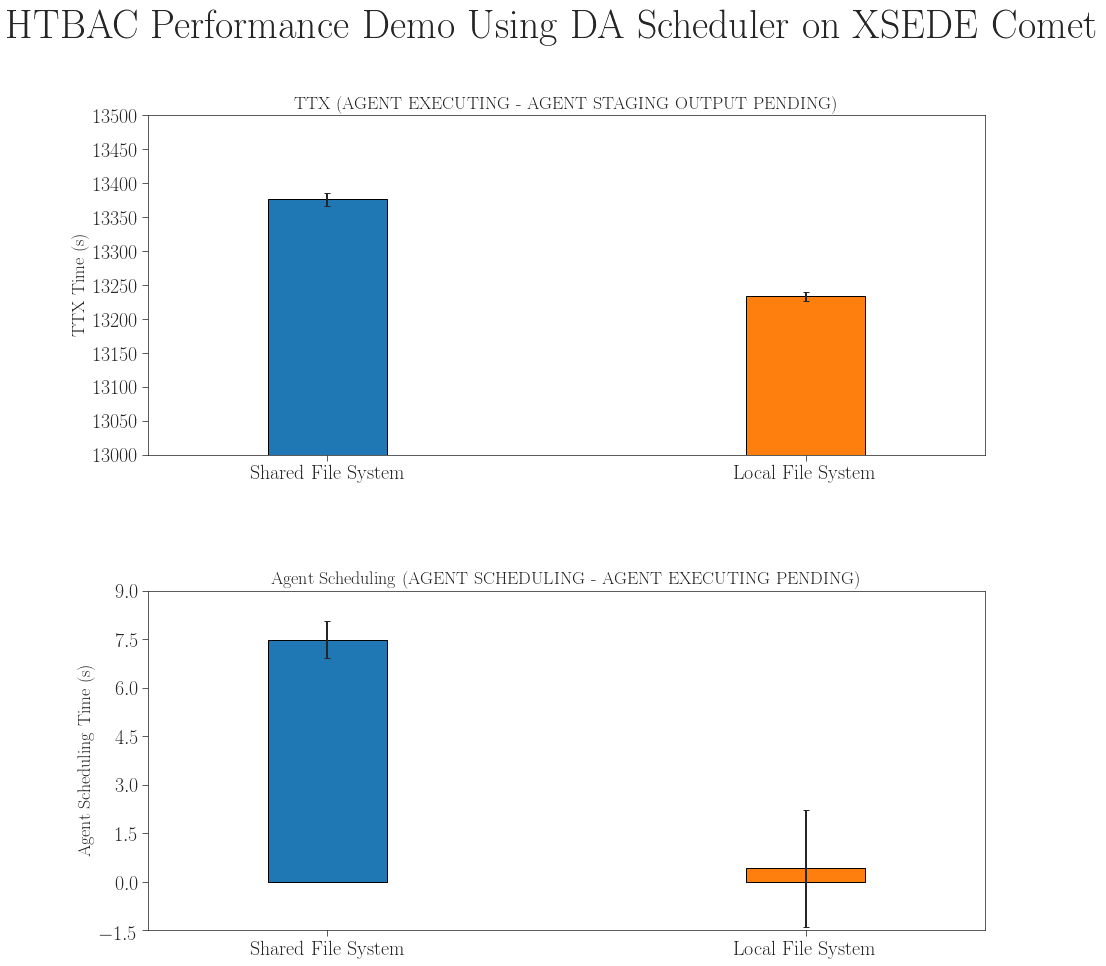

In [267]:
fwidth = 32
fhight = 10
width = 0.25 

fig, axarr = plt.subplots(2, figsize=(15,15))
fig.subplots_adjust(hspace=.4)
fig.suptitle('HTBAC Performance Demo Using DA Scheduler on XSEDE Comet')
axarr[0] = df['TTX'].plot(ax=axarr[0], kind='bar', fontsize=20, width = width, yerr=df_lfs_err, rot = 0)
axarr[0].set_ylabel('TTX Time (s)', fontsize = 18)
axarr[0].set_title('TTX (AGENT EXECUTING - AGENT STAGING OUTPUT PENDING)', fontsize = 18)
axarr[0].set_ylim(13000,13500)
axarr[0].yaxis.set_major_locator(MaxNLocator(integer=True))
axarr[1] = df['Agent Scheduling'].plot(ax=axarr[1], kind='bar', width = width, fontsize=20, yerr=df_lfs_err, rot = 0)
axarr[1].set_ylabel('Agent Scheduling Time (s)', fontsize = 18)
axarr[1].set_title('Agent Scheduling (AGENT SCHEDULING - AGENT EXECUTING PENDING)', fontsize = 18)
axarr[1].set_ylim(-1.5,9.0)
axarr[1].yaxis.set_major_locator(MaxNLocator(integer=False))


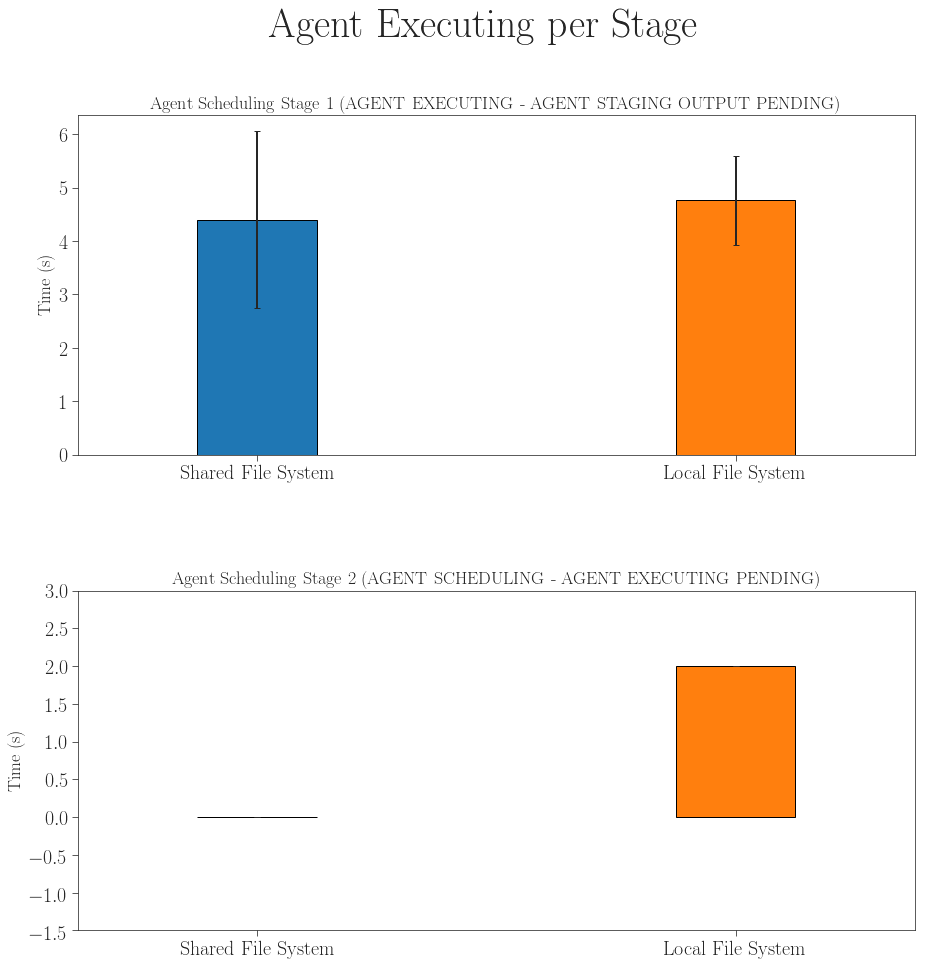

In [53]:
fwidth = 32
fhight = 10
width = 0.25 

fig, axarr = plt.subplots(2, figsize=(15,15))
fig.subplots_adjust(hspace=.4)
fig.suptitle('Agent Executing per Stage')
axarr[0] = df_units['Agent Scheduling Stage 1'].plot(ax=axarr[0], kind='bar', fontsize=20, width = width, yerr=df_units_err, rot = 0)
axarr[0].set_ylabel('Time (s)', fontsize = 18)
axarr[0].set_title('Agent Scheduling Stage 1 (AGENT EXECUTING - AGENT STAGING OUTPUT PENDING)', fontsize = 18)
# axarr[0].set_ylim(13000,13500)
axarr[0].yaxis.set_major_locator(MaxNLocator(integer=True))
axarr[1] = df_units['Agent Scheduling Stage 2'].plot(ax=axarr[1], kind='bar', width = width, fontsize=20, yerr=df_units_err, rot = 0)
axarr[1].set_ylabel('Time (s)', fontsize = 18)
axarr[1].set_title('Agent Scheduling Stage 2 (AGENT SCHEDULING - AGENT EXECUTING PENDING)', fontsize = 18)
axarr[1].set_ylim(-1.5,3.0)
axarr[1].yaxis.set_major_locator(MaxNLocator(integer=False))
